In [5]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier

In [6]:

matches = pd.read_csv("matches_after_preprocessing.csv", index_col=0)

In [7]:

matches

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,hour,day_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
0,2024-08-17,12:30,Matchweek 1,Sat,Away,W,2.0,0.0,Ipswich Town,2.6,...,12,5,3.000000,1.666667,25.000000,10.666667,15.733333,0.000000,0.0,0.0
1,2024-08-25,16:30,Matchweek 2,Sun,Home,W,2.0,0.0,Brentford,2.5,...,16,6,2.333333,1.000000,22.666667,8.333333,15.566667,0.000000,0.0,0.0
2,2024-09-01,16:00,Matchweek 3,Sun,Away,W,3.0,0.0,Manchester Utd,1.8,...,16,6,2.000000,0.000000,24.333333,8.666667,14.400000,0.333333,0.0,0.0
3,2024-09-14,15:00,Matchweek 4,Sat,Home,L,0.0,1.0,Nott'ham Forest,0.9,...,15,5,2.333333,0.000000,16.000000,5.333333,13.933333,0.333333,0.0,0.0
4,2024-09-21,15:00,Matchweek 5,Sat,Home,W,3.0,0.0,Bournemouth,2.0,...,15,5,1.666667,0.333333,14.666667,5.333333,13.966667,0.333333,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2417,2022-04-30,15:00,Matchweek 35,Sat,Away,L,0.0,2.0,Aston Villa,0.5,...,15,5,1.333333,2.000000,12.333333,4.000000,18.166667,0.666667,0.0,0.0
2418,2022-05-08,14:00,Matchweek 36,Sun,Home,L,0.0,4.0,West Ham,0.8,...,14,6,0.666667,2.666667,9.666667,3.000000,18.900000,0.666667,0.0,0.0
2419,2022-05-11,19:45,Matchweek 21,Wed,Away,L,0.0,3.0,Leicester City,1.1,...,19,2,0.000000,3.000000,7.333333,2.333333,19.666667,0.666667,0.0,0.0
2420,2022-05-15,14:00,Matchweek 37,Sun,Away,D,1.0,1.0,Wolves,1.1,...,14,6,0.000000,3.000000,8.666667,3.333333,20.266667,0.333333,0.0,0.0


In [8]:
train = matches[matches["date"] < '2022-11-01']
test = matches[matches["date"] > '2022-11-01']

In [9]:
predictors = ["venue_code", "opp_code", "hour", "day_code", "gf_rolling", "ga_rolling", "sh_rolling", "sot_rolling", "dist_rolling", "fk_rolling", "pk_rolling", "pkatt_rolling"]
X_train = train[predictors]
y_train = train["target"]
X_test = test[predictors]
y_test = test["target"]

In [10]:
X_test.drop(["gf_rolling", "ga_rolling", "sh_rolling", "sot_rolling", "dist_rolling", "fk_rolling", "pk_rolling", "pkatt_rolling"], axis =1)


,venue_code,opp_code,hour,day_code
0,0,10,12,5
1,1,3,16,6
2,0,16,16,6
3,1,19,15,5
4,1,2,15,5
...,...,...,...,...
1717,0,17,14,6
1718,0,19,20,0
1719,1,9,15,5
1720,0,4,14,6


In [11]:
# KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
confusion_matrix = confusion_matrix(y_test, preds) 
accuracy_score = accuracy_score(y_test, preds)
precision_score = precision_score(y_test, preds)
recall_score = recall_score(y_test, preds)
f1_score = f1_score(y_test, preds)
print("confusion matrix", confusion_matrix)
print("accuracy score: ", accuracy_score)
print("precision score: ", precision_score)
print("recall score: ", recall_score)
print("f1 score: ", f1_score)

confusion matrix [[664 237]
 [347 231]]
accuracy score:  0.6051386071670047
precision score:  0.4935897435897436
recall score:  0.39965397923875434
f1 score:  0.4416826003824092


In [12]:
test_accuracy_compiled = []
for k in range(1, 10):
    test_accuracy = []
    for n in range(1, 50):
        clf = KNeighborsClassifier(n_neighbors=n, weights='uniform')
        clf.fit(X_train, y_train)
        test_accuracy.append(round(clf.score(X_test, y_test) * 100, 1))
    test_accuracy_compiled.append(test_accuracy)

test_accuracy_compiled_np = np.transpose(np.array(test_accuracy_compiled))
test_accuracy_compiled_av = np.mean(test_accuracy_compiled_np, axis=1)

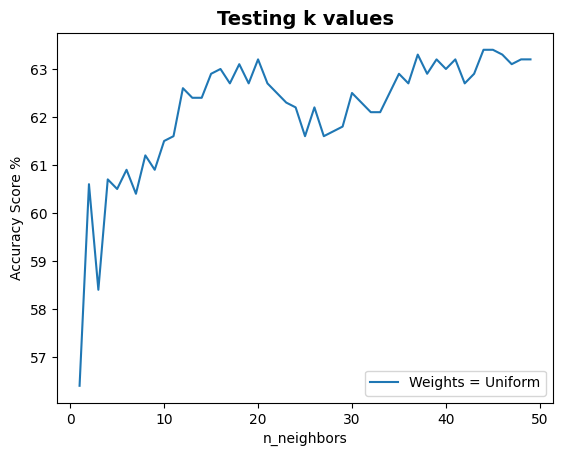

In [13]:
fig, ax = plt.subplots()
ax.plot(range(1, 50, 1), test_accuracy_compiled_av, label='Weights = Uniform')
ax.set_xlabel('n_neighbors')
ax.set_ylabel('Accuracy Score %')
ax.set_title('Testing k values', y=1, fontsize=14, fontweight='bold')
ax.legend(loc=4)
plt.savefig('ml_10_testing_k_values_uniform.png')
plt.show()

In [14]:
best_k = np.argmax(test_accuracy_compiled_av) + 1
best_accuracy = test_accuracy_compiled_av[best_k - 1]

print("Best k:", best_k)
print("Best accuracy score:", best_accuracy)

Best k: 44
Best accuracy score: 63.39999999999999


In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

knn = KNeighborsClassifier(n_neighbors=44)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)

# Calculate metrics
cm = confusion_matrix(y_test, preds)  # Renamed the variable
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)

# Print results
print("Confusion Matrix:\n", cm)
print("Accuracy Score: ", accuracy)
print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("F1 Score: ", f1)


Confusion Matrix:
 [[776 125]
 [417 161]]
Accuracy Score:  0.6335361730899256
Precision Score:  0.5629370629370629
Recall Score:  0.27854671280276816
F1 Score:  0.3726851851851852


In [18]:
skf = StratifiedKFold(n_splits=5, shuffle=True)
# Perform cross-validation
cv_scores = cross_val_score(knn, X_train, y_train, cv=skf)
cv_accuracy = round(np.mean(cv_scores) * 100, 1)

print('Cross-Validation Accuracy Score: ', cv_accuracy, '%')

Cross-Validation Accuracy Score:  63.5 %


In [19]:

cv_scores

array([0.65608466, 0.5978836 , 0.61375661, 0.64361702, 0.66489362])

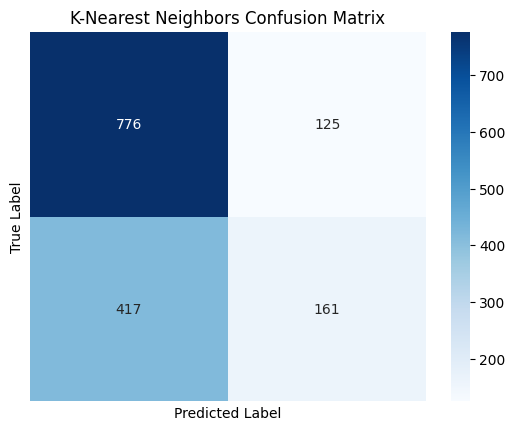

In [24]:
# Calculate confusion matrix and store it in a new variable
cm = confusion_matrix(y_test, preds)

# Your original plot function call, but now using the correct variable `cm`
plot_cross_val_confusion_matrix(cm, display_labels='', title='K-Nearest Neighbors Confusion Matrix', cv=5)
plt.show()